测试100个随机发球

| 模拟时间步长/s | 相对平均误差/m |
| :------------: | :------------: |
|      1e-3      |    6.030e-3     |
|      1e-4      |    6.373e-4   |
|      1e-5      |    5.700e-5     |
|      1e-6      |    7.661e-6        |

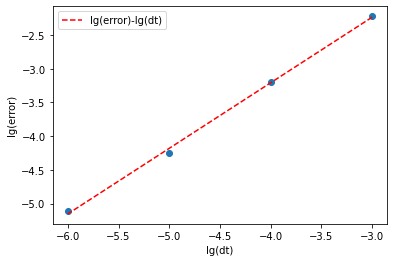

Intercept 0.6876594626520061
Slope 0.9736564612208807
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1625.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           0.000615
Time:                        18:26:08   Log-Likelihood:                 7.3851
No. Observations:                   4   AIC:                            -10.77
Df Residuals:                       2   BIC:                            -12.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm 



def LinearFit(x:list, y:list ,lbl,filename,labelx ,labely):
    X = sm.add_constant(x)
    model = sm.OLS(y,X)
    result = model.fit()

    y_fitted = result.fittedvalues

    plt.scatter(x,y)
    plt.plot(x,y_fitted,'r--',label=lbl)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.legend()
    # plt.savefig(filename+".png",dpi=300)

    plt.show()
    print("Intercept",result.params[0])
    print("Slope",result.params[1])
    print(result.summary())

dt = np.array([1e-3,1e-4,1e-5,1e-6])
dt = np.log10(dt)

error = np.array([6.030e-3,6.373e-4,5.700e-5,7.661e-6])
lgerror = np.log10(error)

LinearFit(dt,lgerror,"lg(error)-lg(dt)","error","lg(dt)","lg(error)",)

No handles with labels found to put in legend.


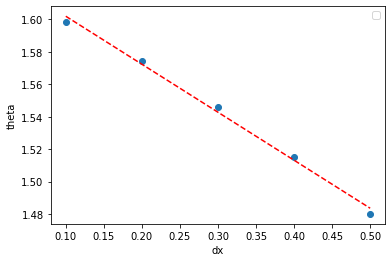

Intercept 1.6315822139732392
Slope -0.29599340917018235
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     619.4
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           0.000142
Time:                        18:26:09   Log-Likelihood:                 22.098
No. Observations:                   5   AIC:                            -40.20
Df Residuals:                       3   BIC:                            -40.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [3]:
th = [1.5985203048969248,1.5740914392561358,1.5462493495753193,1.5149810848852852,1.480078777497259]
dx = [0.1+i*0.1 for i in range(5)]
plt.rc('text', usetex=False)
LinearFit(dx,th,'','dx-theta','dx','theta')

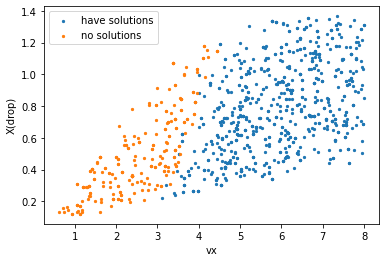

In [16]:
import pickle
file = "vx-drop.bin"
ruler = 3.25
with open(file,"rb") as f:
    data = pickle.load(f)
    plt.scatter(data[0],data[1],label="have solutions",s=5)
    plt.scatter(data[2],data[3],label="no solutions",s=5)
    plt.xlabel("vx")
    plt.ylabel("X(drop)")
    #plt.plot([ruler,ruler],[0.1,0.4])
    plt.legend()
    plt.savefig("vx-drop-1.png",dpi=300)
    plt.show()